In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from matplotlib.animation import FuncAnimation

Natural Frequencies: ω₁=2.395 rad/s, ω₂=5.822 rad/s

Shape of the Modes (A vectors):
Mode 1 (ω₁): A₁ = [-0.38039539 -0.53531677]
Mode 2 (ω₂): A₂ = [-0.92482395  1.30147152]


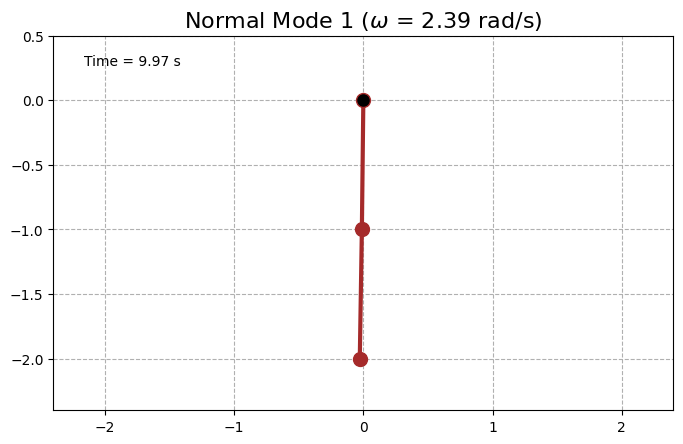

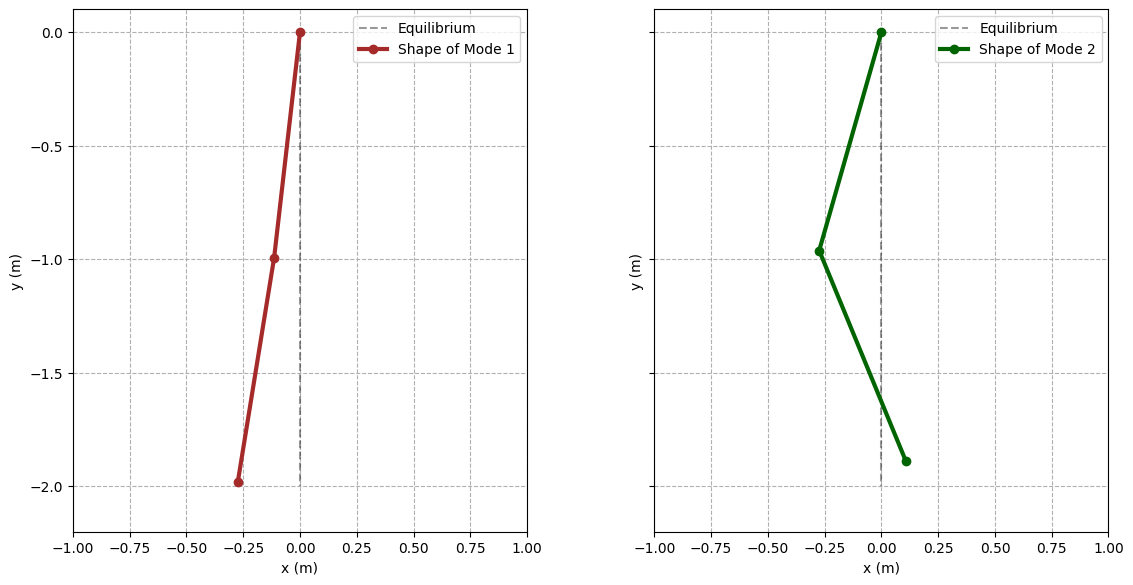

In [ ]:
# --- SYSTEM PARAMETERS ---
L = 2.0      # Total length of the string (m)
m = 2.0      # Total mass of the string (kg)
M = 0.02      # Mass at the end (kg)
g = 9.81     # Acceleration of gravity (m/s^2)

# Parameters for the n=2 discrete model
a = L / 2
m1 = m / 2
m2_prime = m / 2 + M # m2_prime is used for clarity (m_2' in the derivation)

# --- ENERGY MATRICES (T and V) ---
T_matrix = (a**2) * np.array([
    [m1 + m2_prime, m2_prime],
    [m2_prime,      m2_prime]
])

V_matrix = (g * a) * np.array([
    [m1 + m2_prime, 0],
    [0,             m2_prime]
])

# --- NORMAL MODES AND FREQUENCIES CALCULATION ---
# Solves the generalized eigenvalue problem: V*A = w^2*T*A
omega_sq, modes = eigh(V_matrix, T_matrix)

# The columns of the 'modes' matrix are the normal mode vectors (A)
omegas = np.sqrt(omega_sq)
print(f"Natural Frequencies: ω₁={omegas[0]:.3f} rad/s, ω₂={omegas[1]:.3f} rad/s")
print("\nShape of the Modes (A vectors):")
print(f"Mode 1 (ω₁): A₁ = {modes[:, 0]}")
print(f"Mode 2 (ω₂): A₂ = {modes[:, 1]}")


# --- ANIMATION SETUP ---

# Choose which normal mode to display (0 for the first, 1 for the second)
MODE_TO_ANIMATE = 0

omega_anim = omegas[MODE_TO_ANIMATE]
mode_shape = modes[:, MODE_TO_ANIMATE]

# Oscillation amplitude for visualization (in radians)
# The actual amplitude would depend on initial conditions
AMP_PLOT = 0.1

# Plot setup
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-L*1.2, L*1.2)
ax.set_ylim(-L*1.2, 0.5)
ax.set_aspect('equal')
ax.grid(True, linestyle='--')
ax.set_title(f'Normal Mode {MODE_TO_ANIMATE + 1} ($\omega$ = {omega_anim:.2f} rad/s)', fontsize=16)

line, = ax.plot([], [], 'o-', lw=3, markersize=10, color='brown')
pivot, = ax.plot([0], [0], 'ko', markersize=8)
time_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, verticalalignment='top')

def init():
    """Initialization function for the animation."""
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def update(frame):
    """Function that updates each animation frame."""
    t = frame / 30.0
    
    # The solution for a normal mode is A * cos(ω*t)
    # Theta(t) = Amplitude * [mode_shape] * cos(ω*t)
    theta1 = AMP_PLOT * mode_shape[0] * np.cos(omega_anim * t)
    theta2 = AMP_PLOT * mode_shape[1] * np.cos(omega_anim * t)
    
    # Coordinates (y-axis points upwards)
    x1 = a * np.sin(theta1)
    y1 = -a * np.cos(theta1)
    x2 = x1 + a * np.sin(theta2)
    y2 = y1 - a * np.cos(theta2)
    
    line.set_data([0, x1, x2], [0, y1, y2])
    time_text.set_text(f'Time = {t:.2f} s')
    return line, time_text

# --- ANIMATION GENERATION AND SAVING ---
num_frames = 10 * 30 # 10 seconds of animation
ani = FuncAnimation(fig, update, frames=num_frames,
                    init_func=init, blit=True, interval=1000/30)

# Save the animation (requires 'pillow' and/or 'ffmpeg' to be installed)
output_filename = f'animation_mode_{MODE_TO_ANIMATE + 1}'
ani.save(output_filename + '.gif', writer='pillow', fps=30)
# ani.save(output_filename + '.mp4', writer='ffmpeg', fps=30, dpi=150)

plt.show()

# --- STATIC VISUALIZATION OF NORMAL MODES ---

# Amplitude for visualization, same as in the animation
AMP_VIS = 0.3

# Create a figure with two subplots, one for each mode
fig_modes, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
#fig_modes.suptitle('Shape of the Normal Modes', fontsize=16)

# --- Plot Mode 1 ---
ax1 = axs[0]
mode_shape_1 = modes[:, 0]
theta1_m1 = AMP_VIS * mode_shape_1[0]
theta2_m1 = AMP_VIS * mode_shape_1[1]

# Coordinates for mode 1
x1_m1 = a * np.sin(theta1_m1)
y1_m1 = -a * np.cos(theta1_m1)
x2_m1 = x1_m1 + a * np.sin(theta2_m1)
y2_m1 = y1_m1 - a * np.cos(theta2_m1)

# Plotting
ax1.plot([0, 0], [0, -L], 'k--', alpha=0.4, label='Equilibrium') # Equilibrium position
ax1.plot([0, x1_m1, x2_m1], [0, y1_m1, y2_m1], 'o-', color='brown', lw=3, label='Shape of Mode 1')
#ax1.set_title(f'Mode 1 ($\omega_1$ = {omegas[0]:.2f} rad/s)')
ax1.set_aspect('equal')
ax1.set_xlim(-L/2, L/2)
ax1.set_ylim(-L*1.1, 0.1)
ax1.grid(True, linestyle='--')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')
ax1.legend()


# --- Plot Mode 2 ---
ax2 = axs[1]
mode_shape_2 = modes[:, 1]
theta1_m2 = AMP_VIS * mode_shape_2[0]
theta2_m2 = AMP_VIS * mode_shape_2[1]

# Coordinates for mode 2
x1_m2 = a * np.sin(theta1_m2)
y1_m2 = -a * np.cos(theta1_m2)
x2_m2 = x1_m2 + a * np.sin(theta2_m2)
y2_m2 = y1_m2 - a * np.cos(theta2_m2)

# Plotting
ax2.plot([0, 0], [0, -L], 'k--', alpha=0.4, label='Equilibrium') # Equilibrium position
ax2.plot([0, x1_m2, x2_m2], [0, y1_m2, y2_m2], 'o-', color='darkgreen', lw=3, label='Shape of Mode 2')
#ax2.set_title(f'Mode 2 ($\omega_2$ = {omegas[1]:.2f} rad/s)')
ax2.set_aspect('equal')
ax2.set_xlim(-L/2, L/2)
ax2.grid(True, linestyle='--')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('y (m)')
ax2.legend()


# Show the figure
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent the supertitle from overlapping
#Label the axes

#Save the static visualization for a specific value of the mass M
static_output_filename = f'static_modes_{MODE_TO_ANIMATE + 1}'
fig_modes.savefig(static_output_filename + '.png', dpi=300)
plt.show()

Natural frequencies: ω₁ = 2.324 rad/s, ω₂ = 7.312 rad/s
Forcing frequency: Ω = 6.946 rad/s
Amplitudes: A₁ = -0.088 rad, A₂ = 0.084 rad


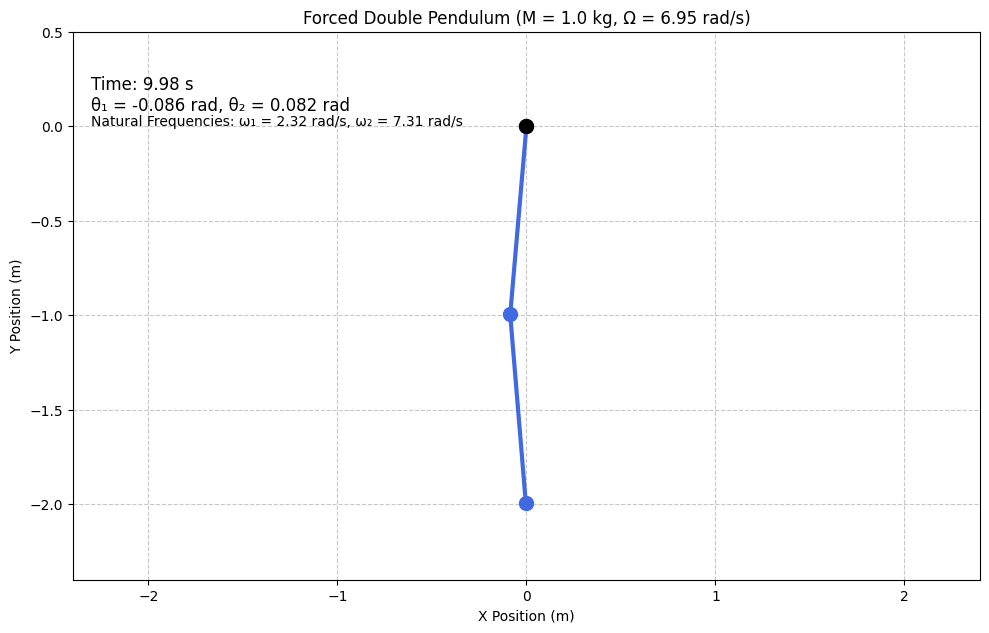

In [3]:
# --- SYSTEM PARAMETERS ---
L = 2.0      # Total length of the string (m)
m = 2.0      # Total mass of the string (kg)
M = 1.0      # Mass at the end (kg)
g = 9.81     # Acceleration of gravity (m/s^2)
F0 = 2.0     # Amplitude of the forcing force (N)
l = L / 2    # Length of each pendulum segment

# Equivalent masses
m1 = m / 2          # Mass of the first pendulum
m2_prime = m/2 + M  # Effective mass of the second pendulum (includes M)

# --- T AND V MATRICES FROM DERIVATION ---
# Kinetic energy matrix T
T_matrix = (l**2) * np.array([
    [m1 + m2_prime, m2_prime],
    [m2_prime,       m2_prime]
])

# Potential energy matrix V
V_matrix = (g * l) * np.array([
    [m1 + m2_prime, 0],
    [0,              m2_prime]
])

# --- NATURAL FREQUENCIES CALCULATION ---
# Solve the generalized eigenvalue problem: V*a = w^2*T*a
omega_sq, modes = eigh(V_matrix, T_matrix) 
omegas = np.sqrt(omega_sq)
print(f"Natural frequencies: ω₁ = {omegas[0]:.3f} rad/s, ω₂ = {omegas[1]:.3f} rad/s")

# --- FORCING SETUP ---
# Set the forcing frequency, for example, near the second natural frequency
forcing_omega = omegas[1] * 0.95 
print(f"Forcing frequency: Ω = {forcing_omega:.3f} rad/s")

# Generalized force vector
Q0 = l * F0 * np.array([1.0, 1.0])

# --- AMPLITUDE CALCULATION ---
# Dynamic matrix: K_dyn = V - Ω²*T
K_dyn = V_matrix - (forcing_omega**2) * T_matrix

# Solve for the amplitude vector A: K_dyn*A = Q0
A = np.linalg.solve(K_dyn, Q0)
print(f"Amplitudes: A₁ = {A[0]:.3f} rad, A₂ = {A[1]:.3f} rad")

# --- ANIMATION ---
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(-L*1.2, L*1.2)
ax.set_ylim(-L*1.2, 0.5)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_title(f'Forced Double Pendulum (M = {M} kg, Ω = {forcing_omega:.2f} rad/s)')
ax.set_xlabel('X Position (m)')
ax.set_ylabel('Y Position (m)')

line, = ax.plot([], [], 'o-', lw=3, markersize=10, color='royalblue')
pivot = ax.plot(0, 0, 'ko', markersize=10)[0]
time_text = ax.text(0.02, 0.92, '', transform=ax.transAxes, fontsize=12, verticalalignment='top')
info_text = ax.text(0.02, 0.85, '', transform=ax.transAxes, fontsize=10, verticalalignment='top')

def init():
    """Initializes the animation plot."""
    line.set_data([], []),
    time_text.set_text('')
    info_text.set_text(f'Natural Frequencies: ω₁ = {omegas[0]:.2f} rad/s, ω₂ = {omegas[1]:.2f} rad/s')
    return line, time_text, info_text

def update(frame):
    """Updates the animation at each frame."""
    t = frame * 0.02  # Time step for a smoother animation
    
    # Angles (steady-state forced solution)
    theta1 = A[0] * np.cos(forcing_omega * t)
    theta2 = A[1] * np.cos(forcing_omega * t)
    
    # Positions of the masses
    x1 = l * np.sin(theta1)
    y1 = -l * np.cos(theta1)
    x2 = x1 + l * np.sin(theta2)
    y2 = y1 - l * np.cos(theta2)
    
    # Update plot data
    line.set_data([0, x1, x2], [0, y1, y2])
    time_text.set_text(f'Time: {t:.2f} s\n'
                       f'θ₁ = {theta1:.3f} rad, θ₂ = {theta2:.3f} rad')
    return line, time_text, pivot

# Animation setup
ani = FuncAnimation(fig, update, frames=500,
                    init_func=init, blit=True, interval=20)

# Save animation (optional, requires 'pillow' or 'ffmpeg')
ani.save('forced_pendulum_n2.gif', writer='pillow', fps=50)
# ani.save('forced_pendulum_n2.mp4', writer='ffmpeg', fps=50, dpi=150)

plt.tight_layout()
plt.show()

Natural Frequencies: ω₁=3.469 rad/s, ω₂=8.509 rad/s, ω₃=14.075 rad/s

Shape of the Modes (A vectors):
Mode 1 (ω₁): A₁ = [1.07845679 1.37490227 1.69790688]
Mode 2 (ω₂): A₂ = [-2.70641654 -0.86855278  6.02355433]
Mode 3 (ω₃): A₃ = [ 4.30258532 -7.16625842  3.3633564 ]


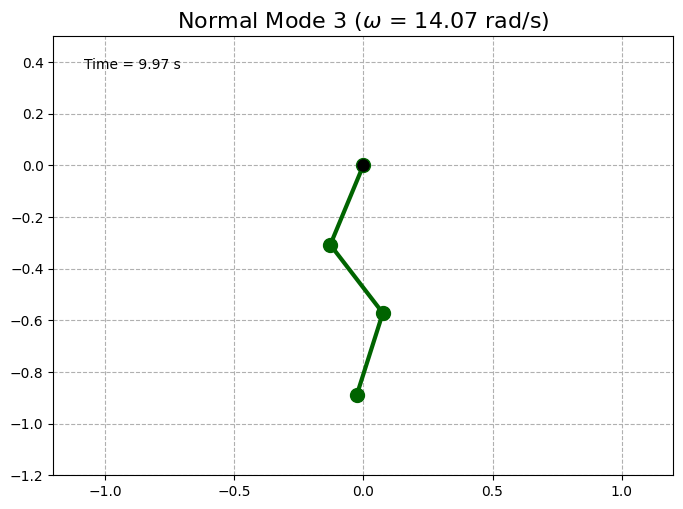

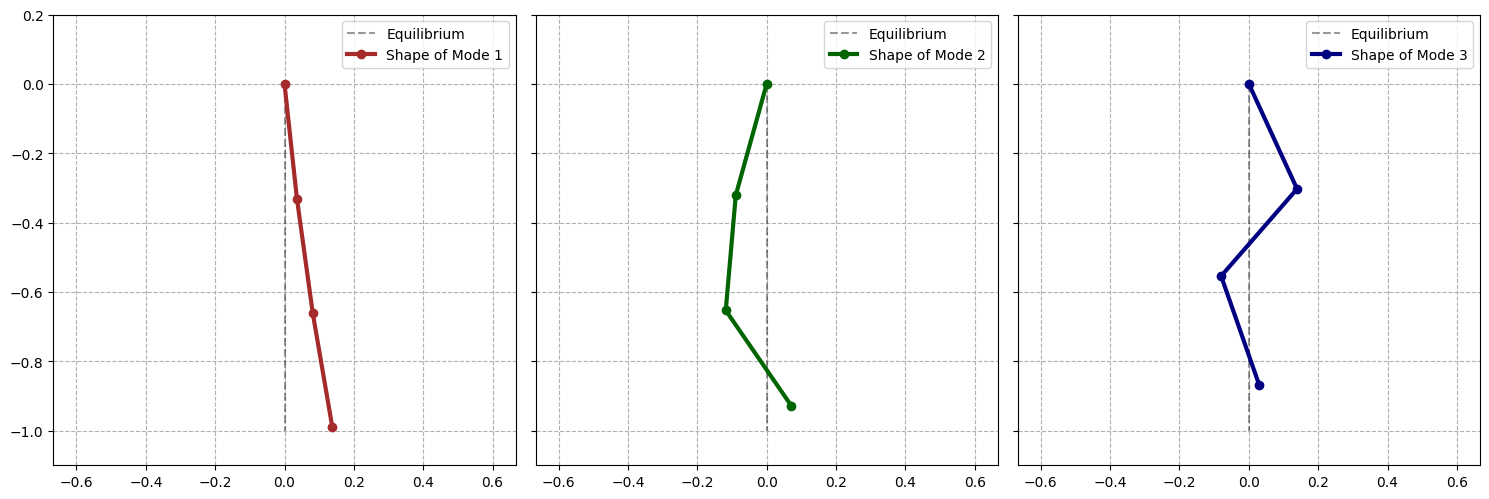

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.linalg import eigh

# --- SYSTEM PARAMETERS ---
L = 1.0      # Total length of the string (m)
m = 1.0      # Total mass of the string (kg)
M = 0.050     # Mass at the end (kg)
g = 9.81     # Acceleration of gravity (m/s^2)

# Parameters for the n=3 discrete model
a = L / 3
m1 = m / 3
m2 = m / 3
m3_prime = m / 3 + M # m_3' in the derivation

# --- ENERGY MATRICES (T and V) ---
# Based on the explicit triple pendulum derivation

# Common coefficients for T and V for clarity
c1 = m1 + m2 + m3_prime # == m + M
c2 = m2 + m3_prime      # == 2m/3 + M
c3 = m3_prime           # == m/3 + M

T_matrix = (a**2) * np.array([
    [c1, c2, c3],
    [c2, c2, c3],
    [c3, c3, c3]
])

V_matrix = (g * a) * np.array([
    [c1, 0,  0 ],
    [0,  c2, 0 ],
    [0,  0,  c3]
])

# --- NORMAL MODES AND FREQUENCIES CALCULATION ---
# Solves the generalized eigenvalue problem: V*A = w^2*T*A
omega_sq, modes = eigh(V_matrix, T_matrix) 

# The columns of the 'modes' matrix are the normal mode vectors (A)
omegas = np.sqrt(omega_sq)
print(f"Natural Frequencies: ω₁={omegas[0]:.3f} rad/s, ω₂={omegas[1]:.3f} rad/s, ω₃={omegas[2]:.3f} rad/s")
print("\nShape of the Modes (A vectors):")
print(f"Mode 1 (ω₁): A₁ = {modes[:, 0]}")
print(f"Mode 2 (ω₂): A₂ = {modes[:, 1]}")
print(f"Mode 3 (ω₃): A₃ = {modes[:, 2]}")


# --- ANIMATION SETUP ---

# Choose which normal mode to display (0, 1, or 2)
MODE_TO_ANIMATE = 2

omega_anim = omegas[MODE_TO_ANIMATE]
mode_shape = modes[:, MODE_TO_ANIMATE]

# Oscillation amplitude for visualization (in radians)
AMP_PLOT = 0.2

# Plot setup
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-L*1.2, L*1.2)
ax.set_ylim(-L*1.2, 0.5)
ax.set_aspect('equal')
ax.grid(True, linestyle='--')
ax.set_title(f'Normal Mode {MODE_TO_ANIMATE + 1} ($\omega$ = {omega_anim:.2f} rad/s)', fontsize=16)

line, = ax.plot([], [], 'o-', lw=3, markersize=10, color='darkgreen')
pivot, = ax.plot([0], [0], 'ko', markersize=8)
time_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, verticalalignment='top')

def init():
    """Initialization function for the animation."""
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def update(frame):
    """Function that updates each animation frame."""
    t = frame / 30.0
    
    # The solution for a normal mode is A * cos(ω*t)
    theta1 = AMP_PLOT * mode_shape[0] * np.cos(omega_anim * t)
    theta2 = AMP_PLOT * mode_shape[1] * np.cos(omega_anim * t)
    theta3 = AMP_PLOT * mode_shape[2] * np.cos(omega_anim * t)
    
    # Coordinates (y-axis points upwards)
    x1 = a * np.sin(theta1)
    y1 = -a * np.cos(theta1)
    x2 = x1 + a * np.sin(theta2)
    y2 = y1 - a * np.cos(theta2)
    x3 = x2 + a * np.sin(theta3)
    y3 = y2 - a * np.cos(theta3)

    line.set_data([0, x1, x2, x3], [0, y1, y2, y3])
    time_text.set_text(f'Time = {t:.2f} s')
    return line, time_text

# --- ANIMATION GENERATION AND SAVING ---
num_frames = 10 * 30 # 10 seconds of animationLeft
ani = FuncAnimation(fig, update, frames=num_frames,
                    init_func=init, blit=True, interval=1000/30)

# Save the animation (requires 'pillow' and/or 'ffmpeg' to be installed)
output_filename = f'animation_n3_mode_{MODE_TO_ANIMATE + 1}'
ani.save(output_filename + '.gif', writer='pillow', fps=30)
# ani.save(output_filename + '.mp4', writer='ffmpeg', fps=30, dpi=150)

plt.show()

# --- STATIC VISUALIZATION OF NORMAL MODES (N=3) ---

# Amplitude for visualization, can be the same as in the animation
AMP_VIS = 0.1 

# Create a figure with three subplots, one for each mode
fig_modes, axs = plt.subplots(1, 3, figsize=(15, 7), sharey=True)
#fig_modes.suptitle('Shape of the Normal Modes (N=3)', fontsize=16)

# Colors for each mode for visual distinction
colors = ['brown', 'darkgreen', 'navy']

# Iterate to plot each of the 3 modes
for i in range(3):
    ax = axs[i]
    mode_shape = modes[:, i]
    omega = omegas[i]
    
    # Calculate the angles for the maximum elongation of the mode
    theta1 = AMP_VIS * mode_shape[0]
    theta2 = AMP_VIS * mode_shape[1]
    theta3 = AMP_VIS * mode_shape[2]
    
    # Calculate the Cartesian coordinates for this mode
    x1 = a * np.sin(theta1)
    y1 = -a * np.cos(theta1)
    x2 = x1 + a * np.sin(theta2)
    y2 = y1 - a * np.cos(theta2)
    x3 = x2 + a * np.sin(theta3)
    y3 = y2 - a * np.cos(theta3)
    
    # Plot the equilibrium position as a reference
    ax.plot([0, 0], [0, -L], 'k--', alpha=0.4, label='Equilibrium')
    
    # Plot the shape of the mode
    ax.plot([0, x1, x2, x3], [0, y1, y2, y3], 'o-', color=colors[i], lw=3, label=f'Shape of Mode {i+1}')
    
    # Configure each subplot
    #ax.set_title(f'Mode {i+1} ($\omega_{i+1}$ = {omega:.2f} rad/s)')
    ax.set_aspect('equal')
    ax.set_xlim(-L/1.5, L/1.5)
    ax.set_ylim(-L*1.1, 0.2)
    ax.grid(True, linestyle='--')
    ax.legend(loc='upper right')

# Show the final figure
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust for the suptitle
plt.show()

Natural frequencies: ω₁ = 2.266 rad/s, ω₂ = 12.106 rad/s, ω₃ = 20.547 rad/s
Forcing frequency: Ω = 20.342 rad/s
Amplitudes: A₁ = 0.010 rad, A₂ = -0.019 rad, A₃ = 0.008 rad


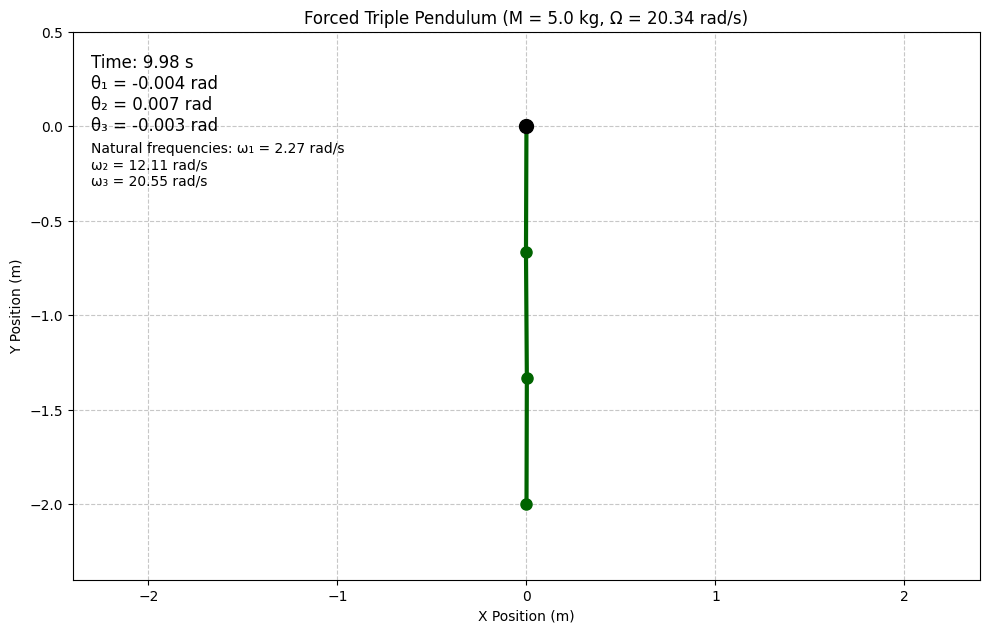

In [ ]:
# --- SYSTEM PARAMETERS ---
L = 2.0      # Total length of the string (m)
m = 2.0      # Total mass of the string (kg)
M = 5.0      # Mass at the end (kg)
g = 9.81     # Acceleration of gravity (m/s^2)
F0 = 2.0     # Amplitude of the forcing force (N)
l = L / 3    # Length of each pendulum segment

# Equivalent masses
m1 = m / 3          # Mass of the first pendulum
m2 = m / 3          # Mass of the second pendulum
m3_prime = m/3 + M  # Effective mass of the third pendulum (includes M)

# --- T AND V MATRICES ---
# Kinetic energy matrix T
T_matrix = (l**2) * np.array([
    [m + M,          (2*m/3) + M,     m3_prime],
    [(2*m/3) + M,    (2*m/3) + M,     m3_prime],
    [m3_prime,       m3_prime,         m3_prime]
])

# Potential energy matrix V
V_matrix = (g * l) * np.array([
    [m + M,          0,               0],
    [0,              (2*m/3) + M,     0],
    [0,              0,               m3_prime]
])

# --- NATURAL FREQUENCIES CALCULATION ---
# Solve the generalized eigenvalue problem: V*a = w^2*T*a
omega_sq, modes = eigh(V_matrix, T_matrix)
omegas = np.sqrt(omega_sq)
print(f"Natural frequencies: ω₁ = {omegas[0]:.3f} rad/s, ω₂ = {omegas[1]:.3f} rad/s, ω₃ = {omegas[2]:.3f} rad/s")

# --- FORCING SETUP ---
forcing_omega = omegas[2] * 0.99  # Frequency near ω₃
print(f"Forcing frequency: Ω = {forcing_omega:.3f} rad/s")

# Generalized force vector (applied to all pendulum bobs)
Q0 = l * F0 * np.array([1.0, 1.0, 1.0])

# --- AMPLITUDE CALCULATION ---
# Dynamic matrix: K_dyn = V - Ω²*T
K_dyn = V_matrix - (forcing_omega**2) * T_matrix

# Solve: K_dyn*A = Q0
A = np.linalg.solve(K_dyn, Q0)
print(f"Amplitudes: A₁ = {A[0]:.3f} rad, A₂ = {A[1]:.3f} rad, A₃ = {A[2]:.3f} rad")

# --- ANIMATION ---
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(-L*1.2, L*1.2)
ax.set_ylim(-L*1.2, 0.5)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_title(f'Forced Triple Pendulum (M = {M} kg, Ω = {forcing_omega:.2f} rad/s)')
ax.set_xlabel('X Position (m)')
ax.set_ylabel('Y Position (m)')

line, = ax.plot([], [], 'o-', lw=3, markersize=8, color='darkgreen')
pivot = ax.plot(0, 0, 'ko', markersize=10)[0]
time_text = ax.text(0.02, 0.96, '', transform=ax.transAxes, fontsize=12, verticalalignment='top')
info_text = ax.text(0.02, 0.80, '', transform=ax.transAxes, fontsize=10, verticalalignment='top')

def init():
    """Initializes the animation plot."""
    line.set_data([], [])
    time_text.set_text('')
    info_text.set_text(f'Natural frequencies: ω₁ = {omegas[0]:.2f} rad/s\nω₂ = {omegas[1]:.2f} rad/s\nω₃ = {omegas[2]:.2f} rad/s')
    return line, time_text, info_text

def update(frame):
    """Updates the animation at each frame."""
    t = frame * 0.02  # Time step
    import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.linalg import eigh

    # Angles (steady-state forced solution)
    theta1 = A[0] * np.cos(forcing_omega * t)
    theta2 = A[1] * np.cos(forcing_omega * t)
    theta3 = A[2] * np.cos(forcing_omega * t)
    
    # Positions of the masses
    x0, y0 = 0, 0
    x1 = l * np.sin(theta1)
    y1 = -l * np.cos(theta1)
    x2 = x1 + l * np.sin(theta2)
    y2 = y1 - l * np.cos(theta2)
    x3 = x2 + l * np.sin(theta3)
    y3 = y2 - l * np.cos(theta3)
    
    # Update line
    line.set_data([x0, x1, x2, x3], [y0, y1, y2, y3])
    time_text.set_text(f'Time: {t:.2f} s\n'
                       f'θ₁ = {theta1:.3f} rad\nθ₂ = {theta2:.3f} rad\nθ₃ = {theta3:.3f} rad')
    return line, time_text, pivot

# Animation setup
ani = FuncAnimation(fig, update, frames=500,
                    init_func=init, blit=True, interval=20)

# Save animation (optional)
ani.save('forced_triple_pendulum.gif', writer='pillow', fps=50)
# ani.save('forced_triple_pendulum.mp4', writer='ffmpeg', fps=50, dpi=150)

plt.tight_layout()
plt.show()